## Week 3 : Logistic Regression
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Recap on Logistic Regression
2. Data for Classification Task
3. Classification task evaluation metrics
4. Dealing with data imbalance (self practice)
```

<hr>

In [51]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Data for Classification Task

* How is data for regression different from classification task different?

Covid-19 Dataset collected is from March 2020 - November 2021. The target/goal is to predict the disease based on the patient state.

<strong>Target Feature: Corona Result.</strong>

<strong>Task:</strong> apply the tools of machine learning to predict which patients got infected by Covid-19.

## 2 Import libraries

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Load Data

In [48]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/ML/Lab 3/ml-labs-data.db')

with session_engine.connect() as conn:
    covid19_df = pd.read_sql_query(text('SELECT * FROM covid19_lab_sample'), con=conn, parse_dates=['test_date'])

covid19_df.drop('index', axis=1, inplace=True)
covid19_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,age
0,2021-02-12,0,0,0,0,0,Positive,No,male,Other,51
1,2020-10-14,0,0,0,0,0,Positive,No,male,Other,47
2,2021-02-22,0,0,0,0,0,Positive,No,female,Contact with confirmed,35
3,2021-03-06,1,0,0,0,1,Positive,No,female,Contact with confirmed,37
4,2021-09-24,0,0,0,0,0,Positive,No,female,Contact with confirmed,51


## 3.1 Exploratory data analysis (EDA)

An approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods (i.e matplotlib, distribution plot ..)<br>
Today we are going to try a tool called [pandas profiling](https://github.com/pandas-profiling/pandas-profiling). It can be easily be installed with:
1. pip: `pip3 install pandas-profiling`  
1. conda: `conda install -c conda-forge pandas-profiling
`

**Note:** All that is done by pandas profilling can be easily be achieved with pandas, matplotlib and numpy

In [49]:
# import ydata_profiling

# Create the data profile report
# profileReport = ydata_profiling.profile_report.ProfileReport(covid19_df)

In [50]:
# profileReport.to_file('covid_profile.html')

## 3.2 Data preprocessing
1. How to deal with missing values?
1. How to deal with categorical data?
1. Is data scaling needed?

<span style="color:red">TASK: Split data to train and test</span> <br>
<span style="color:red">TASK: Impute missing values</span> <br>
<span style="color:red">TASK: Encode categorical features</span> <br>
<span style="color:red">TASK: Use min-max scaler for feature scaling </span> <br>

In [52]:
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Select features
covid19_df.sort_values(by=['test_date'])
covid19_df.drop(['test_date'], axis = 1, inplace=True)

# Encode the target label
target_encoding = {'Negative':0, 'Positive':1}
covid19_df['corona_result'] = covid19_df['corona_result'].apply(lambda x : target_encoding.get(x))

Y = covid19_df['corona_result']
X = covid19_df.drop(['corona_result'], axis = 1)

# Split data to train and test
x_train, x_test, y_train, y_test =  train_test_split(X, Y, train_size=0.8, shuffle=False)

# imputing missing values
imputer = SimpleImputer(missing_values=None, strategy="most_frequent")
imputer.fit(x_train)
x_train_imp = pd.DataFrame(imputer.transform(x_train))
x_train_imp.columns = x_train.columns
x_train_imp.index = x_train.index
x_test_imp = pd.DataFrame(imputer.transform(x_test))
x_test_imp.columns = x_test.columns
x_test_imp.index = x_test.index

In [56]:
# encode categorical features
features_to_encode = ['test_indication', 'age_60_and_above', 'gender']
encoder = OneHotEncoder(cols=features_to_encode, handle_unknown='ignore')
encoder.fit(x_train_imp)

x_train = encoder.transform(x_train_imp)
x_test = encoder.transform(x_test_imp)

# TODO: feature scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [57]:
x_train.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above_1', 'age_60_and_above_2', 'gender_1', 'gender_2',
       'test_indication_1', 'test_indication_2', 'test_indication_3', 'age'],
      dtype='object')

## 4 Build, Train and Test Model

Now we are ready to see Logistic Regression in practice.

<span style="color:red">Task : Fit Logistic Regression  </span> <br>
<span style="color:red">Task : Output Accuracy, Precision, and Recall scores on test set </span>

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# fit Logistic Regression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# calculate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))

Testing accuracy = 0.755
Testing precision = 0.8740740740740741
Testing recall = 0.592964824120603


## 5. Prediction Results Interpretation & Model perfomence Measurement

1. looking at Logistic Regression Coefficients
2. Prediction threshold

### Task :
1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

In [59]:
# Logistic Regression Coefficients
print("----Logistic Regression Coefficients----")
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

----Logistic Regression Coefficients----
('cough', 1.01671134619911)
('fever', 1.6772993944645422)
('sore_throat', 0.9804408023015667)
('shortness_of_breath', 0.3957268419855403)
('head_ache', 1.6250171424293862)
('age_60_and_above_1', 0.006225303625847009)
('age_60_and_above_2', -0.00555803594127459)
('gender_1', 0.036274356686780876)
('gender_2', -0.03560708900220292)
('test_indication_1', -0.9694461127612993)
('test_indication_2', 1.2246101136877254)
('test_indication_3', -0.2544967332418503)
('age', -0.19647846759657964)


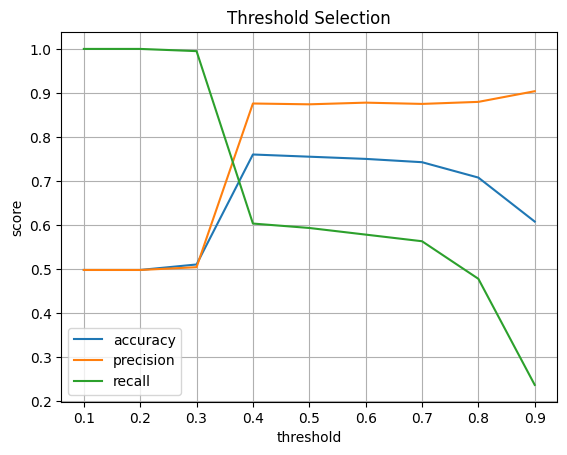

In [62]:
# TODO: calculate metrics for each threshold above and plot the result as below.
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
pred_proba = clf.predict_proba(x_test)

results = [[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')
plt.plot(thresholds, results[1], label = 'precision')
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

# Confusion matrix

1. Why one may need confusion matrix?
2. What new information does it show? <br><br>

<table><tr><td>
<img align='center' src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' style='width: 350px;'>
</td><td>
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png' style='width: 400px;'></td></tr></table>
<br>


<span style="color:red">Task: Implement a confussion matrix method from scratch using python list and numpy</span>

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
## computing confusion matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print("Confusion Matrix for Test 1")
print(confusion_matrix(y_true, y_pred))

titanic_cm = confusion_matrix(y_test, clf.predict(x_test))
print('Confusion Matrix for Covid-19:\n', titanic_cm, '\n')

Confusion Matrix for Test 1
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Confusion Matrix for Covid-19:
 [[184  17]
 [ 81 118]] 



## <center>Self-Practice  Task</center>

* Using `covid19-2.csv` dataset given to you.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Fill missing values
    1. Encode categorical features
    1. Create new features from the existing features
    1. Train a logistic regression model that will predict if a person is infected by COvid-19 `(corona_result)`.
    1. Select the optimal prediction threshold
    1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

In [ ]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
print('sklearn Confusion Matrix for Sample set:\n', confusion_matrix(y_true, y_pred))
print('sklearn Confusion Matrix for Covid-19:\n', confusion_matrix(y_test, clf.predict(x_test)), '\n')